In [96]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
np.set_printoptions(precision=3, suppress=True)
pd.options.display.float_format = '${:,.3f}'.format


Perform descriptive analysis and determine if the data contain null values

In [87]:
header = ["variance", "skew", "curtsies", "entropy", "classes"]
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
df = pd.read_csv(url, names=header)

In [88]:
df.head()

,variance,skew,curtsies,entropy,classes
0,$3.622,$8.666,$-2.807,$-0.447,0
1,$4.546,$8.167,$-2.459,$-1.462,0
2,$3.866,$-2.638,$1.924,$0.106,0
3,$3.457,$9.523,$-4.011,$-3.594,0
4,$0.329,$-4.455,$4.572,$-0.989,0


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skew      1372 non-null   float64
 2   curtsies  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   classes   1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [90]:
df.shape

(1372, 5)

In [91]:
df.columns.size

5

In [92]:
df.columns

Index(['variance', 'skew', 'curtsies', 'entropy', 'classes'], dtype='object')

In [93]:
df.index

RangeIndex(start=0, stop=1372, step=1)

Visualize the data (e.g., as shown in the class example)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020FAB6E6940>,
      dtype=object)

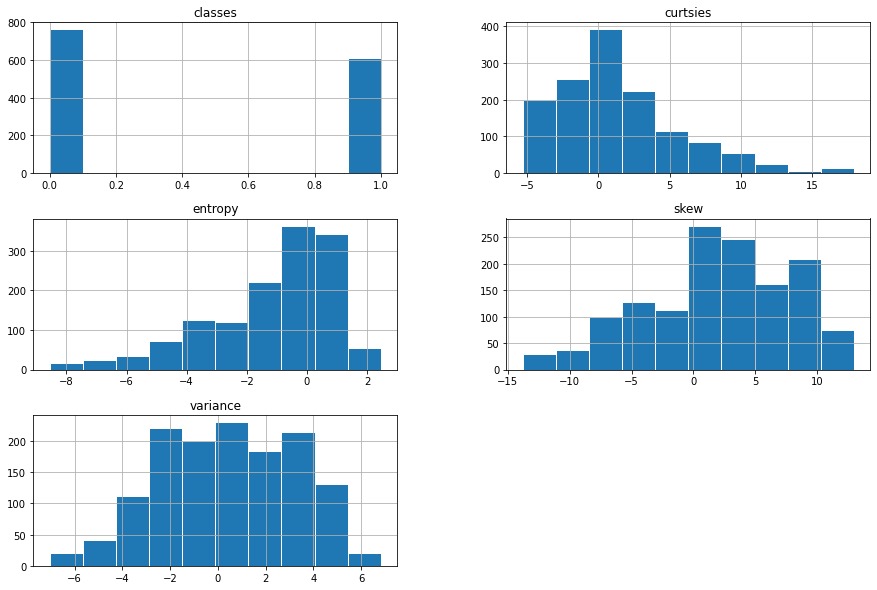

In [94]:
df.hist(edgecolor = 'white', figsize = (15,10))

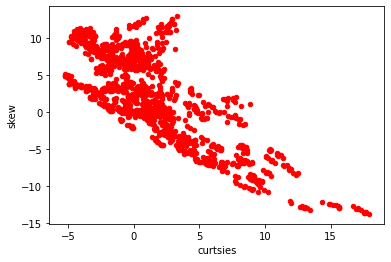

In [95]:
df.plot.scatter(x="curtsies", y="skew", c="red")

 Train the model with all features, calculate the accuracy of the model.

In [97]:
df.mean()

variance    $0.434
skew        $1.922
curtsies    $1.398
entropy    $-1.192
classes     $0.445
dtype: float64

In [98]:
df.median()

variance    $0.496
skew        $2.320
curtsies    $0.617
entropy    $-0.587
classes     $0.000
dtype: float64

In [99]:
df.isnull().sum()

variance    0
skew        0
curtsies    0
entropy     0
classes     0
dtype: int64

In [103]:
average = df['entropy'].mean()
average

-1.191656520043731

In [105]:
med_en =  df['entropy'].median()
med_en

-0.58665

In [106]:
max_index = df["skew"].idxmax()
max_index

126

In [107]:
df['curtsies'][max_index]

3.3285

In [109]:
standard_dev = df['variance'].std()
standard_dev

2.842762586278562

 Train the model with a subset of the features and compare the accuracy with last step

In [110]:
df2=df.drop("classes", axis=1)
df2.shape

(1372, 4)

In [112]:
df2.head()

,variance,skew,curtsies,entropy
0,$3.622,$8.666,$-2.807,$-0.447
1,$4.546,$8.167,$-2.459,$-1.462
2,$3.866,$-2.638,$1.924,$0.106
3,$3.457,$9.523,$-4.011,$-3.594
4,$0.329,$-4.455,$4.572,$-0.989


shows min for entropy and max for variance and skew as index 

In [116]:
pd_p = pd.pivot_table(df, index=["skew"], aggfunc={"entropy":np.min, "variance":np.max})
pd_p

,entropy,variance
skew,,
$-13.773,$-2.032,$-3.379
$-13.678,$-2.618,$-3.696
$-13.659,$-2.493,$-3.599
$-13.498,$-3.320,$-4.003
$-13.459,$-2.777,$-3.750
...,...,...
$12.540,$-3.526,$-2.226
$12.606,$-5.789,$-2.398
$12.625,$-7.661,$-2.447
